# Inferential Statistics

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {'figure.figsize':(5,5)})

%matplotlib inline

## uniform distribution

In [5]:
from scipy.stats import uniform

In [6]:
n =10000
start = 10
width = 20

data_uniform=uniform.rvs(size=n, loc=start, scale=width)

In [7]:
data_uniform

array([18.04693077, 10.17129481, 17.59235928, ..., 10.58998778,
       22.56850043, 28.64780054])

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution')]

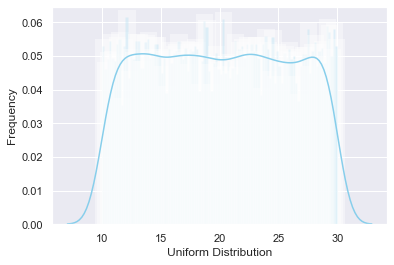

In [12]:
ax = sns.distplot(data_uniform,
                 bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={'linewidth':15}
                 )
ax.set(xlabel = 'Uniform Distribution',
       ylabel = 'Frequency'
      )

## normal distribution

In [13]:
from scipy.stats import norm

In [15]:
data_normal = norm.rvs(size=10000, loc=0, scale=1)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution')]

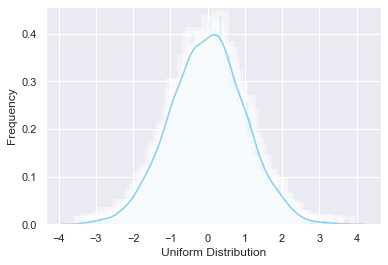

In [16]:
ax = sns.distplot(data_normal,
                 bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={'linewidth':15}
                 )
ax.set(xlabel = 'Uniform Distribution',
       ylabel = 'Frequency'
      )

## binomial distribution

In [17]:
from scipy.stats import binom

In [18]:
data_binom = binom.rvs(n=10, p=0.8, size=10000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution')]

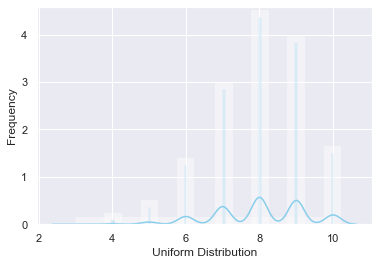

In [19]:
ax = sns.distplot(data_binom,
                 bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={'linewidth':15}
                 )
ax.set(xlabel = 'Uniform Distribution',
       ylabel = 'Frequency'
      )

## bernouli distribution

In [21]:
from scipy.stats import bernoulli

In [22]:
data_bern = bernoulli.rvs(size=10000, p=0.6)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution')]

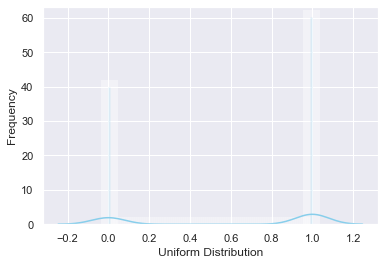

In [23]:
ax = sns.distplot(data_bern,
                 bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={'linewidth':15}
                 )
ax.set(xlabel = 'Uniform Distribution',
       ylabel = 'Frequency'
      )

## Confident Interval

In [24]:
import pandas as pd
import numpy as np
df = pd.read_csv('dataset/heart.csv')

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [26]:
df.groupby('sex').agg({'chol':[np.mean, np.std, np.size]})

chol                
           mean        std size
sex                            
0    261.455128  64.466781  312
1    239.237027  43.155535  713

In [29]:
mean = 261.455
sd = 64.4
n = 312
z= 1.96

In [30]:
se = sd / np.sqrt(n)

In [31]:
se

3.6459320499455985

In [32]:
low = mean - z*se
hi = mean +z*se

In [33]:
(low, hi)

(254.3089731821066, 268.60102681789334)

### Example 2

In [35]:
np.random.seed(42)
normal_dist_us_male = np.random.normal(loc=181, scale=24, size=6000)
normal_dist_us_female = np.random.normal(loc=132, scale=22, size=6500)

In [40]:
all_mass_value = np.concatenate((normal_dist_us_male, normal_dist_us_female), axis=0)

In [41]:
df_ppl_mass = pd.DataFrame({'us_people_mass_pound': all_mass_value})

In [42]:
df_ppl_mass.head()

,us_people_mass_pound
0,192.921140
1,177.681657
2,196.544525
3,217.552717
4,175.380319


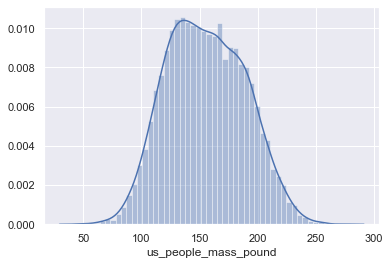

In [43]:
sns.distplot(df_ppl_mass['us_people_mass_pound'])

In [47]:
pop_mean_mass = df_ppl_mass['us_people_mass_pound'].mean()

In [48]:
pop_mean_mass

155.4232805942338

In [49]:
pop_std_mass = df_ppl_mass['us_people_mass_pound'].std()

In [52]:
pop_std_mass

33.585190883958624

sample_means = []
n =25

for sample_mean in range (0,300):
    sample_values = np.random.choice(a=df_ppl_mass['us_people_mass_pound'])
    sample_mean = np.mean(sample_means)
    sample_means.append(sample_mean)

## Hypothesis Thesis